### У цьому завданні вам потрібно завантажити ось [цей](https://drive.google.com/file/d/1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6/view?usp=share_link) датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

### Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [17]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Load

In [3]:
from pathlib import Path
from urllib.request import urlretrieve
import zipfile

URL = "https://drive.usercontent.google.com/download?id=1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6&export=download"

FILE_NAME = Path('content/data.zip')
FOLDER_NAME = Path('content/data')

In [5]:
urlretrieve(URL, FILE_NAME)

with zipfile.ZipFile(FILE_NAME, 'r') as zipfp:
    zipfp.extractall(FOLDER_NAME.parent)

In [125]:
df_2d = pd.read_csv(FOLDER_NAME / 'data_2d.csv', header=None, names=['X', 'Y', 'Z'])
df_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       200 non-null    float64
 1   Y       200 non-null    float64
 2   Z       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [126]:
df_mnist = pd.read_csv(FOLDER_NAME / 'mnist.csv', header=None)
df_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 3.0 MB


### Двовимірний датасет

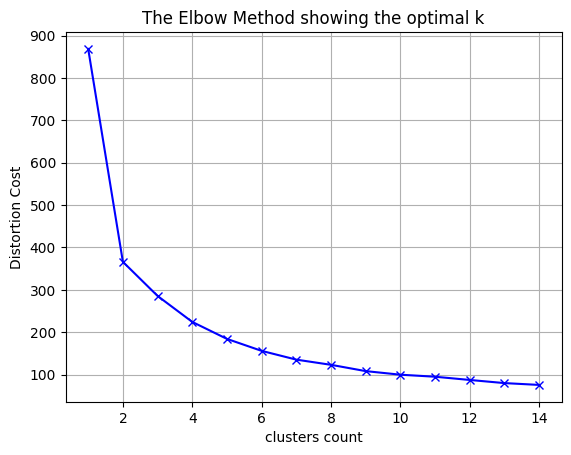

In [127]:
clusters_range = range(1, 15)
distortion_cost = []

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_2d)
    distortion_cost.append(kmeans.inertia_)

plt.plot(clusters_range, distortion_cost, 'bx-')
plt.xlabel('clusters count')
plt.ylabel('Distortion Cost')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()

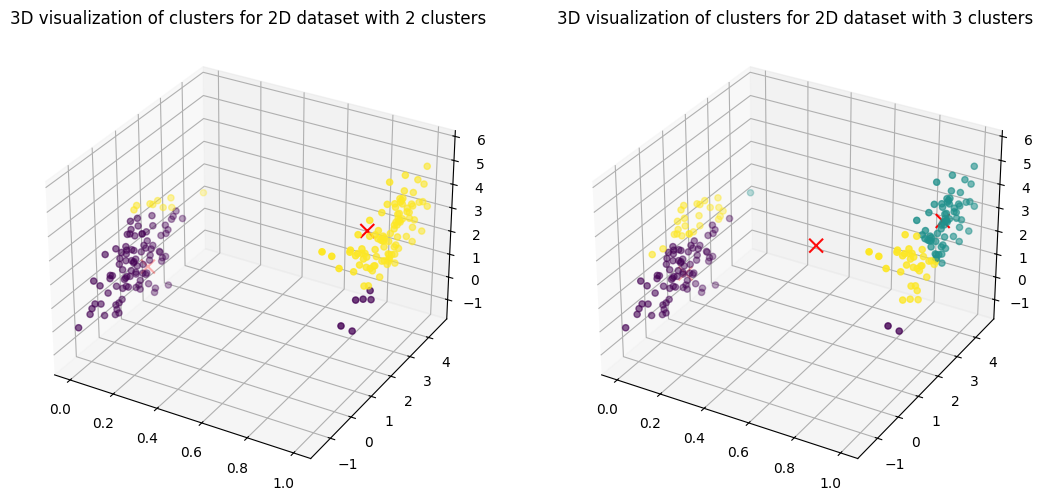

In [128]:
check_clusters = [2, 3]
result = {}

figure = plt.figure(figsize=(20, 6))

for k in check_clusters:
    ax =plt.subplot(1, 3, check_clusters.index(k) + 1, projection='3d')
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_2d)   

    result[k] = {"cluster_centers": kmeans.cluster_centers_, "labels": kmeans.labels_}
    df_2d_clustered = df_2d.copy()
    df_2d_clustered['cluster'] = kmeans.labels_

    ax.scatter(df_2d_clustered['X'], df_2d_clustered['Y'], df_2d_clustered['Z'], c=df_2d_clustered['cluster'], cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color='red' , marker='x', s=100)
    plt.title(f'3D visualization of clusters for 2D dataset with {kmeans.n_clusters} clusters')
    
plt.show()

In [129]:
result

{2: {'cluster_centers': array([[0.06185567, 0.99733162, 0.83427624],
         [0.91262136, 2.47607733, 3.50850036]]),
  'labels': array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
         1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1])},
 3: {'cluster_centers': array([[0.02631579, 0.89800973, 0.51392667],
         [0.98461538, 3.06677288, 3.66492588],
         [0.57627119, 1.42691789, 2.79697836]]),
  'labels': ar

Change dimension for 2d visulization

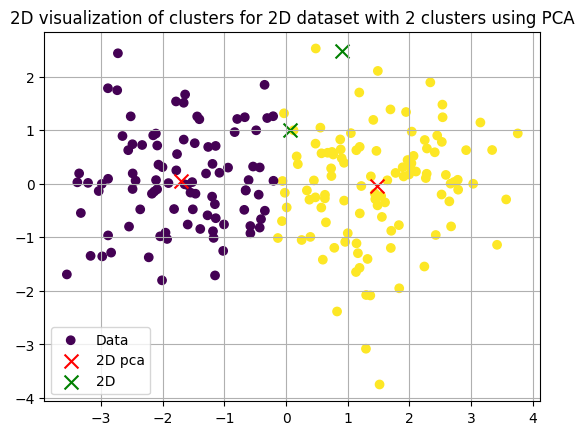

array([[-1.69851873,  0.05787562],
       [ 1.47628263, -0.05030311]])

In [150]:
pca = PCA(n_components=2)
df_2d_pca = pca.fit_transform(df_2d)
df_2d_pca = pd.DataFrame(df_2d_pca, columns=['X', 'Y'])

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_2d_pca)

plt.scatter(df_2d_pca['X'], df_2d_pca['Y'], c=kmeans.labels_, cmap='viridis', label="Data")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red' , marker='x', s=100, label="centers 2D pca")
plt.scatter(result[2]["cluster_centers"][:, 0], result[2]["cluster_centers"][:, 1], color='green' , marker='x', s=100, label="centers 2D")
plt.title(f'2D visualization of clusters for 2D dataset with {kmeans.n_clusters} clusters using PCA')
plt.grid()
plt.legend()
plt.show()

kmeans.cluster_centers_


!! Check if not use column X

In [143]:
df_2d['X'].unique()

array([0., 1.])

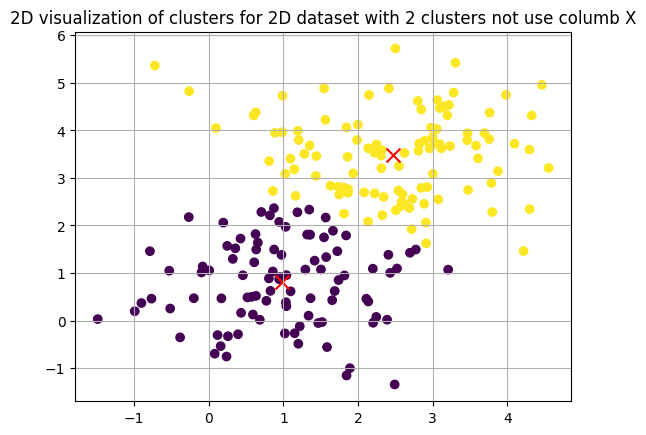

In [155]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_2d[['Y', 'Z']])

plt.scatter(df_2d['Y'], df_2d['Z'], c=kmeans.labels_, cmap='viridis', label="Data")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red' , marker='x', s=100, label="centers 2D")
plt.title(f'2D visualization of clusters for 2D dataset with {kmeans.n_clusters} clusters not use columb X')
plt.grid()
plt.show()

